# Surface plotting of FPN and clusters within FPN

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting, image, surface, datasets
import hcp_utils as hcp
import nibabel as nib

## Brain Surface + Total FPN

First lets use the parcellation from hcp.mmp which are the 360 Glasser parcels (+ 20 more that I will ignore). Note, you have to skip the first entry in mmp.label because it's empty. Then extract all the FPN ones and create an array with all zeros except the Parcels I want to plot.

In [58]:
# hcp.mmp is the glasser parcellation
mmp_greyordinates = hcp.mmp.map_all  # an integer array of size 91282, giving the id of each greyordinate
mmp_labels = hcp.mmp.labels
mmp_ids = hcp.mmp.ids

# Set all parcels to 0
Xp = np.zeros(len(hcp.mmp.labels))

# Load the FPN parcellation key file
file_path = '/home/hmueller2/Downloads/FPN_parcellation_cole/CortexSubcortex_ColeAnticevic_NetPartition_wSubcorGSR_parcels_LR_LabelKey.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extract the 'KEYVALUE' (index) of rows that have 7 as 'NETWORKKEY'
glasser_indices_FPN = []
for line in lines[1:362]:  # Skip the header line
    parts = line.strip().split()
    if parts[9] == '7':  # 'NETWORKKEY' is the 10th column (index 9)
        glasser_indices_FPN.append(parts[1])  # 'KEYVALUE' is the 2nd column (index 1)

print(glasser_indices_FPN)

# Set specific parcels to 1, only consider the first 380 rows
for idx in glasser_indices_FPN:
    if int(idx) < 360:
        Xp[mmp_ids[int(idx)]] = 1

# Remove the first number from Xp
Xp = Xp[1:380]

print (len(Xp))
print(Xp)

['14', '15', '29', '63', '73', '77', '80', '82', '83', '85', '89', '91', '92', '97', '98', '111', '133', '144', '145', '149', '170', '171', '194', '195', '209', '238', '242', '243', '253', '254', '257', '260', '261', '263', '265', '269', '271', '272', '273', '277', '278', '291', '313', '324', '325', '329', '342', '350', '351', '357']
379
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0.

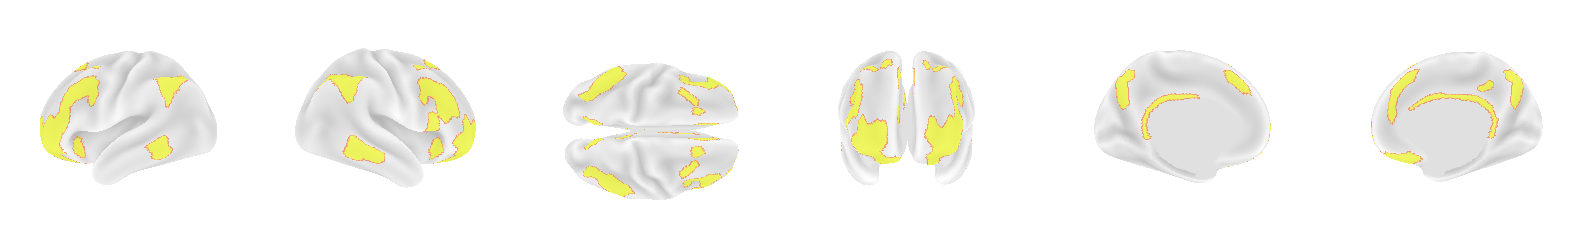

In [59]:
# Map values to surface vertices
surface_data = hcp.unparcellate(Xp, hcp.mmp)
cortex_data = hcp.cortex_data(surface_data)

min_thresh = 0.1
max_thresh = 1
cm = 'plasma'

fig = plt.figure(figsize=[20, 10])
ax = fig.add_subplot(1, 6, 1, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.inflated, 
    hcp.cortex_data(hcp.unparcellate(Xp, hcp.mmp)), 
    hemi='left', 
    view='lateral', 
    colorbar=False,
    threshold=min_thresh, 
    vmax=max_thresh, 
    bg_map=hcp.mesh.sulc, 
    bg_on_data=True, 
    darkness=0.3, 
    axes=ax, 
    figure=fig, 
    cmap=cm, 
    symmetric_cbar=True
)
ax = fig.add_subplot(1, 6, 2, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.inflated, 
    hcp.cortex_data(hcp.unparcellate(Xp, hcp.mmp)), 
    hemi='right', 
    view='lateral', 
    colorbar=False,
    threshold=min_thresh, 
    vmax=max_thresh, 
    bg_map=hcp.mesh.sulc, 
    bg_on_data=True, 
    darkness=0.3, 
    axes=ax, 
    figure=fig, 
    cmap=cm, 
    symmetric_cbar=True
)
ax = fig.add_subplot(1, 6, 3, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.inflated, 
    hcp.cortex_data(hcp.unparcellate(Xp, hcp.mmp)), 
    view='dorsal', 
    colorbar=False,
    threshold=min_thresh, 
    vmax=max_thresh, 
    bg_map=hcp.mesh.sulc, 
    bg_on_data=True, 
    darkness=0.3, 
    axes=ax, 
    figure=fig, 
    cmap=cm, 
    symmetric_cbar=True
)
ax = fig.add_subplot(1, 6, 4, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.inflated, 
    hcp.cortex_data(hcp.unparcellate(Xp, hcp.mmp)), 
    view='anterior', 
    colorbar=False,
    threshold=min_thresh, 
    vmax=max_thresh, 
    bg_map=hcp.mesh.sulc, 
    bg_on_data=True, 
    darkness=0.3, 
    axes=ax, 
    figure=fig, 
    cmap=cm, 
    symmetric_cbar=True
)
ax = fig.add_subplot(1, 6, 5, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.very_inflated_left, 
    hcp.left_cortex_data(hcp.unparcellate(Xp, hcp.mmp)), 
    hemi='left', 
    view='medial', 
    colorbar=False,
    threshold=min_thresh, 
    vmax=max_thresh, 
    bg_map=hcp.mesh.sulc_left, 
    bg_on_data=True, 
    darkness=0.3, 
    axes=ax, 
    figure=fig, 
    cmap=cm, 
    symmetric_cbar=True
)
ax = fig.add_subplot(1, 6, 6, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.very_inflated_right, 
    hcp.right_cortex_data(hcp.unparcellate(Xp, hcp.mmp)), 
    hemi='right', 
    view='medial', 
    colorbar=False,
    threshold=min_thresh, 
    vmax=max_thresh, 
    bg_map=hcp.mesh.sulc_right, 
    bg_on_data=True, 
    darkness=0.3, 
    axes=ax, 
    figure=fig, 
    cmap=cm, 
    symmetric_cbar=True
)
plt.show()

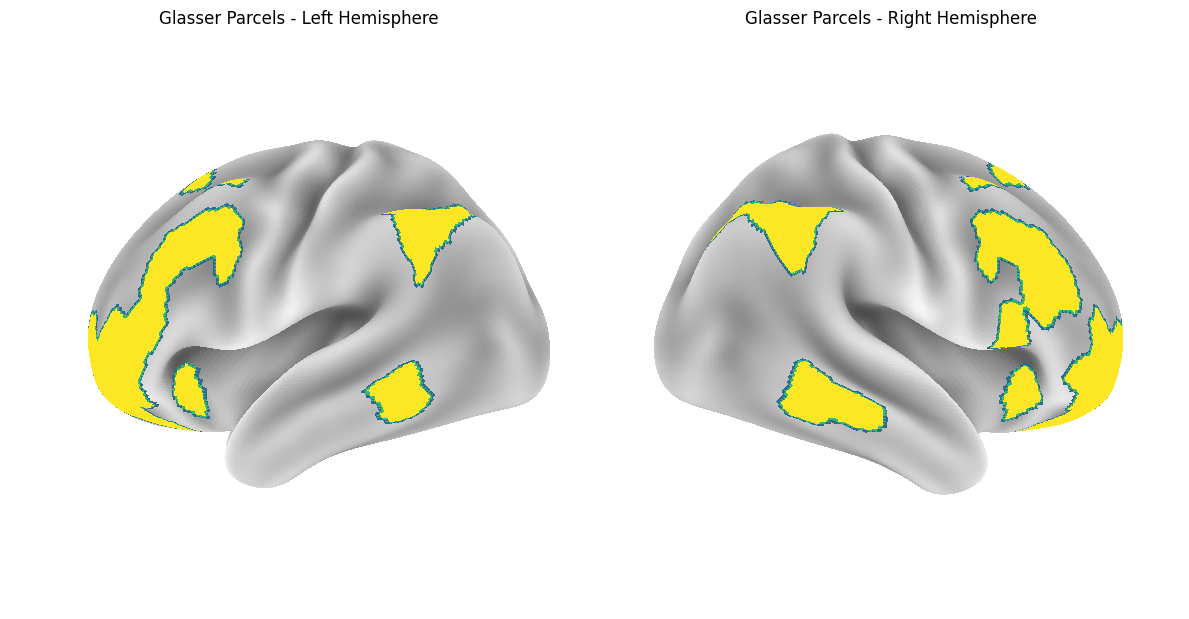

In [51]:
import matplotlib.pyplot as plt
from nilearn import plotting

# Map values to surface vertices
surface_data = hcp.unparcellate(Xp, hcp.mmp)
cortex_data = hcp.cortex_data(surface_data)

# Create a figure
plt.figure(figsize=(12, 8))

# Plot the parcels on left hemisphere
ax1 = plt.subplot(1, 2, 1, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.inflated,  # Use inflated surface
    cortex_data,        # Parcel data mapped to surface
    view='lateral',     # Lateral view
    colorbar=False,     # Show colorbar
    threshold=min_thresh,
    bg_map=hcp.mesh.sulc,  # Background map to show sulci
    axes=ax1,
    cmap='viridis',
    title="Glasser Parcels - Left Hemisphere"
)

# Plot the parcels on right hemisphere
ax2 = plt.subplot(1, 2, 2, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.inflated,
    cortex_data,
    hemi='right',
    view='lateral',
    colorbar=False,
    threshold=min_thresh,
    bg_map=hcp.mesh.sulc,
    axes=ax2,
    cmap='viridis',
    title="Glasser Parcels - Right Hemisphere"
)

plt.tight_layout()
plt.show()


## Clusters of FPN

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 2. 0. 0. 1. 0. 1. 1. 0. 2. 0. 0. 0. 1. 0. 2. 2. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 2. 0. 0. 1. 1. 0. 1. 0.
 2. 0. 0. 0. 2. 0. 2. 1. 2. 0. 0. 0. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 1. 0. 0. 0. 1.

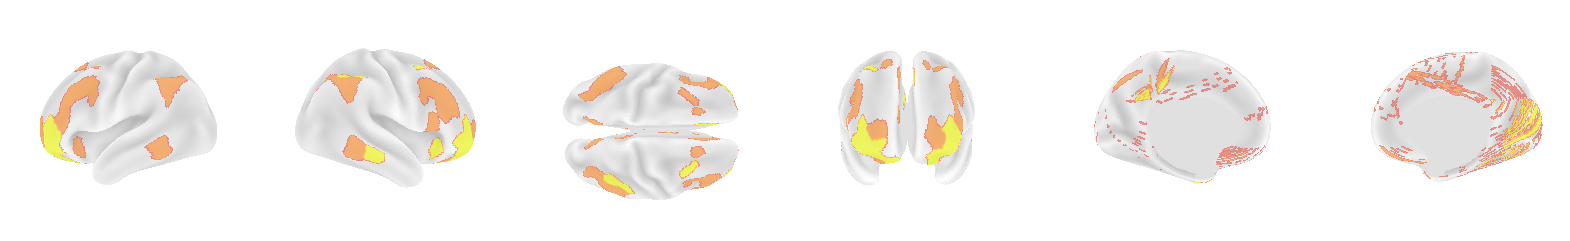

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting

subject = 'sub-01'
run = 'run_06'

# Load the parcel_clusters_df DataFrame
parcel_clusters_path = f'/home/hmueller2/ibc_code/ibc_output_KMeans_onMDS/{run}/parcel-cluster_{subject}.csv'  # Update this path to the actual file location
parcel_clusters_df = pd.read_csv(parcel_clusters_path)

# Initialize Xp with zeros
Xp = np.zeros(len(hcp.mmp.labels))

# Fill Xp using the "index_Xp" and "cluster" columns from parcel_clusters_df
for _, row in parcel_clusters_df.iterrows():
    Xp[int(row['index_Xp'])] = row['cluster']

# Remove the first number from Xp
Xp = Xp[1:380]

print(Xp)
print(len(Xp))

# Map values to surface vertices
surface_data = hcp.unparcellate(Xp, hcp.mmp)
cortex_data = hcp.cortex_data(surface_data)

min_thresh = 0.1
max_thresh = 2
cm = 'plasma'

fig = plt.figure(figsize=[20, 10])
ax = fig.add_subplot(1, 6, 1, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.inflated, 
    cortex_data, 
    hemi='left', 
    view='lateral', 
    colorbar=False,
    threshold=min_thresh, 
    vmax=max_thresh, 
    bg_map=hcp.mesh.sulc, 
    bg_on_data=True, 
    darkness=0.3, 
    axes=ax, 
    figure=fig, 
    cmap=cm, 
    symmetric_cbar=True
)
ax = fig.add_subplot(1, 6, 2, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.inflated, 
    cortex_data, 
    hemi='right', 
    view='lateral', 
    colorbar=False,
    threshold=min_thresh, 
    vmax=max_thresh, 
    bg_map=hcp.mesh.sulc, 
    bg_on_data=True, 
    darkness=0.3, 
    axes=ax, 
    figure=fig, 
    cmap=cm, 
    symmetric_cbar=True
)
ax = fig.add_subplot(1, 6, 3, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.inflated, 
    cortex_data, 
    view='dorsal', 
    colorbar=False,
    threshold=min_thresh, 
    vmax=max_thresh, 
    bg_map=hcp.mesh.sulc, 
    bg_on_data=True, 
    darkness=0.3, 
    axes=ax, 
    figure=fig, 
    cmap=cm, 
    symmetric_cbar=True
)
ax = fig.add_subplot(1, 6, 4, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.inflated, 
    cortex_data, 
    view='anterior', 
    colorbar=False,
    threshold=min_thresh, 
    vmax=max_thresh, 
    bg_map=hcp.mesh.sulc, 
    bg_on_data=True, 
    darkness=0.3, 
    axes=ax, 
    figure=fig, 
    cmap=cm, 
    symmetric_cbar=True
)
ax = fig.add_subplot(1, 6, 5, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.very_inflated_left, 
    hcp.left_cortex_data(cortex_data), 
    hemi='left', 
    view='medial', 
    colorbar=False,
    threshold=min_thresh, 
    vmax=max_thresh, 
    bg_map=hcp.mesh.sulc_left, 
    bg_on_data=True, 
    darkness=0.3, 
    axes=ax, 
    figure=fig, 
    cmap=cm, 
    symmetric_cbar=True
)
ax = fig.add_subplot(1, 6, 6, projection='3d')
plotting.plot_surf_stat_map(
    hcp.mesh.very_inflated_right, 
    hcp.right_cortex_data(cortex_data), 
    hemi='right', 
    view='medial', 
    colorbar=False,
    threshold=min_thresh, 
    vmax=max_thresh, 
    bg_map=hcp.mesh.sulc_right, 
    bg_on_data=True, 
    darkness=0.3, 
    axes=ax, 
    figure=fig, 
    cmap=cm, 
    symmetric_cbar=True
)
plt.show()

# Save the figure
output_path = f'/home/hmueller2/ibc_code/ibc_output_KMeans_onMDS/{run}/cluster-brain_{subject}.png'
fig.savefig(output_path)